# Task 2: Approximating linear vector fields

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
import vectorfields_utils

## Part 1: estimate linear vector field

In [4]:
x0 = np.loadtxt("linear_vectorfield_data_x0.txt", dtype=float)
x1 = np.loadtxt("linear_vectorfield_data_x1.txt", dtype=float)
x0_x, x0_y = x0.T
x1_x, x1_y = x1.T

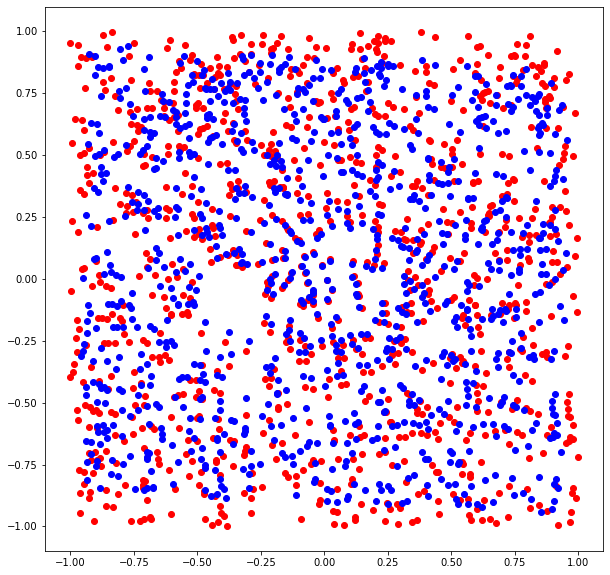

In [5]:
fig = plt.figure(figsize=(10,10))
_ = plt.scatter(x0_x, x0_y,color='r')
_ = plt.scatter(x1_x, x1_y, color='b')
#_ = plt.savefig("datapoints_x0_x1")
_ = plt.show

In [6]:
delta_t = 0.1
v = (x1-x0)/delta_t
A,_,_,_ = np.linalg.lstsq(a=x0,b=v,rcond=1e-6)

In [7]:
t_eval = np.linspace(0,delta_t,100)
x1_approx = []
for i in range(len(x0)):
    sol = solve_ivp(vectorfields_utils.linear_approximation,[0,delta_t],x0[i],args=[A],t_eval=t_eval)
    x1_approx.append([sol.y[0,-1], sol.y[1,-1]])
    

In [8]:
mse = np.linalg.norm(x1_approx-x1)**2/1000
print(mse)

0.0030599275959897333


## Part 3

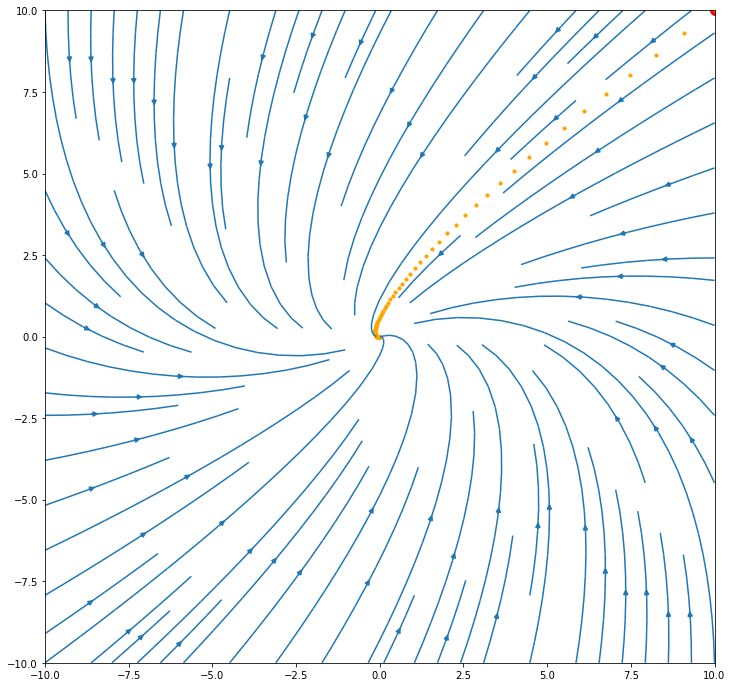

In [12]:
T_end = 100
p = 10
t_eval = np.linspace(0,T_end,1000)
sol = solve_ivp(vectorfields_utils.linear_approximation, [0,T_end], [p,p],t_eval=t_eval,args=[A])
sol_x, sol_y = sol.y 

plt = vectorfields_utils.plot_phase_portrait(A, p)
_ = plt.scatter(p,p,c='red',s=100)
_ = plt.scatter(sol_x, sol_y, c= 'orange', s=10)
_ = plt.savefig("phase_portrait")